In [1]:
## importing necessary files.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the dataset.
df = pd.read_csv("dataframe_.csv")

df.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
## Checking for any null values:

df.isnull().sum()

input     1
output    1
dtype: int64

In [4]:
## Checking the shape of the dataset.

df.shape

(1697, 2)

In [5]:
## Dropping the null values since there is only one value which is null.

df.dropna(inplace=True)

print(df)

           input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1696 rows x 2 columns]


In [6]:
df.shape

(1696, 2)

## Exploratory Data Analysis.

Going to work on the descriptive analysis i.e. mean, median, mode, Standard deviation. This can help  to identify the central tendency and dispersion of the data, as well as to detect any skewness or outliers.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


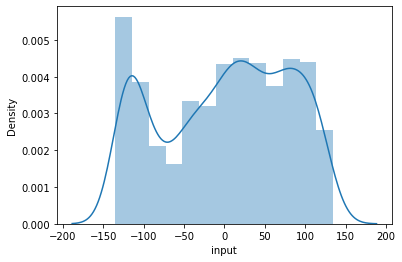

In [7]:
sns.distplot(df['input'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


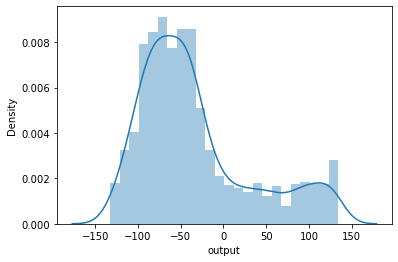

In [8]:
sns.distplot(df['output'])
plt.show()

In [9]:
## Calculating the mean, median and mode:
mean = df.mean()

median = df.median()

mode = df.mode().iloc[0]

std = df.std()

print("Mean:\n", mean)
print("-------------------")
print("\nMedian:\n", median)
print("-------------------")
print("\nMode:\n", mode)
print("-------------------")
print("\nStandard Deviation:\n", std)

Mean:
 input      1.159933
output   -34.088017
dtype: float64
-------------------

Median:
 input     10.195194
output   -50.470981
dtype: float64
-------------------

Mode:
 input    -125.366669
output    -95.000000
Name: 0, dtype: float64
-------------------

Standard Deviation:
 input     79.005970
output    65.771112
dtype: float64


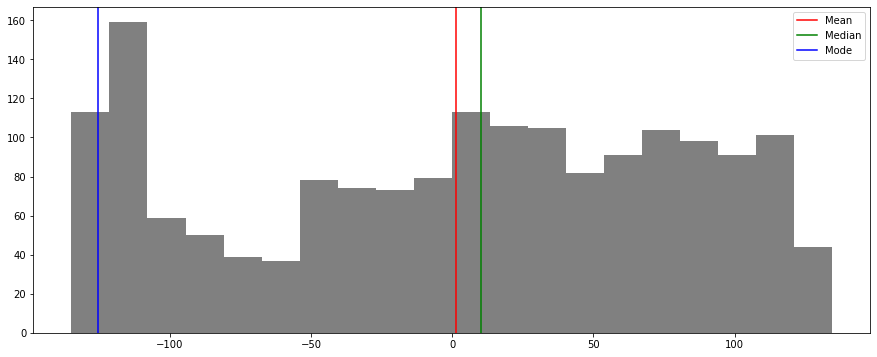

In [10]:
# Plotting the data using a histogram
plt.figure(figsize=(15, 6))
plt.hist(df['input'], bins=20, color='gray')
plt.axvline(df['input'].mean(), color='red', label='Mean')
plt.axvline(df['input'].median(), color='green', label='Median')
plt.axvline(df['input'].mode().iloc[0], color='blue', label='Mode')
plt.legend()
plt.show()

From the above histogram we can see that the values of mean and median are closer to each other than we can say that the data is symmetrical not that much skewed. This tells us that the accuracy level will be good.

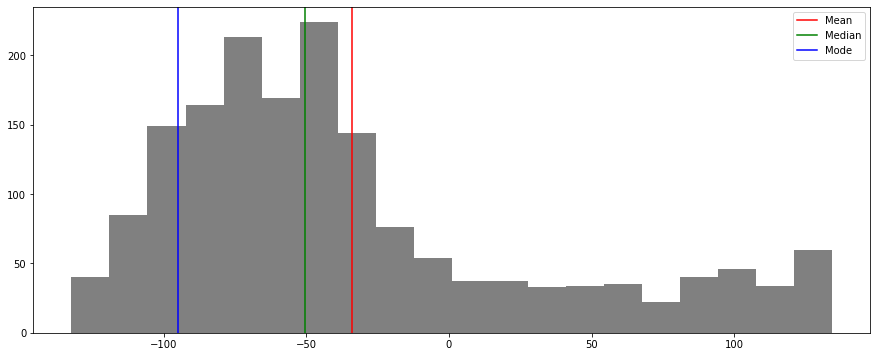

In [11]:
plt.figure(figsize=(15, 6))
plt.hist(df['output'], bins=20, color='gray')
plt.axvline(df['output'].mean(), color='red', label='Mean')
plt.axvline(df['output'].median(), color='green', label='Median')
plt.axvline(df['output'].mode().iloc[0], color='blue', label='Mode')
plt.legend()
plt.show()

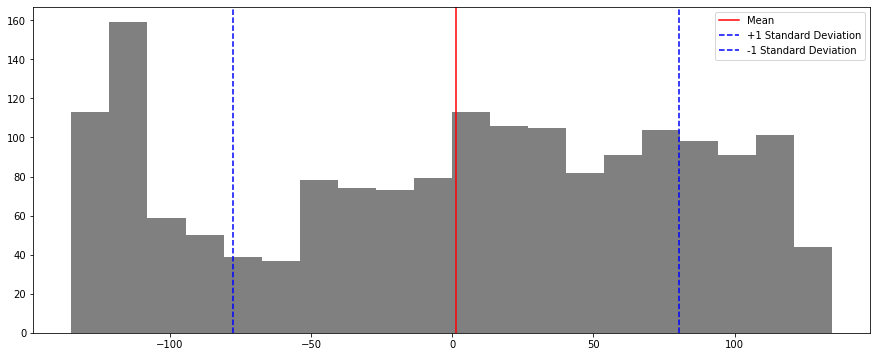

In [12]:
## Determing the variability in the dataset to check the dataset.

plt.figure(figsize=(15, 6))
plt.hist(df['input'], bins=20, color='gray')
plt.axvline(df['input'].mean(), color='red', label='Mean')
plt.axvline(df['input'].mean() + df['input'].std(), color='blue', linestyle='dashed', label='+1 Standard Deviation')
plt.axvline(df['input'].mean() - df['input'].std(), color='blue', linestyle='dashed', label='-1 Standard Deviation')
plt.legend()
plt.show()

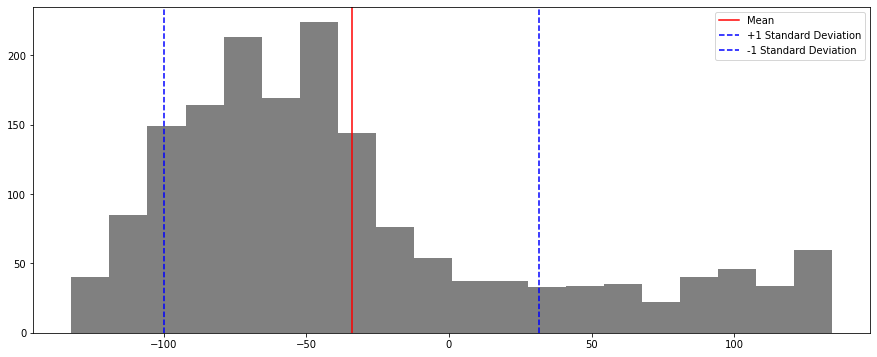

In [13]:
plt.figure(figsize=(15, 6))
plt.hist(df['output'], bins=20, color='gray')
plt.axvline(df['output'].mean(), color='red', label='Mean')
plt.axvline(df['output'].mean() + df['output'].std(), color='blue', linestyle='dashed', label='+1 Standard Deviation')
plt.axvline(df['output'].mean() - df['output'].std(), color='blue', linestyle='dashed', label='-1 Standard Deviation')
plt.legend()
plt.show()

So from the above the graphs of Standard Deviation we can conclude that the data is somewhat not clustered and they are desirable to make the predictions.

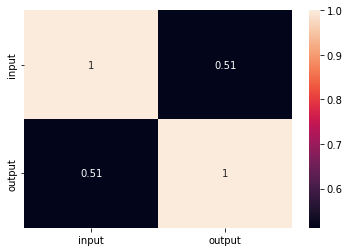

In [14]:
## Calculating the Correlation between the input and output values.

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Build a Machine Learning Model to predict output based on the input column.

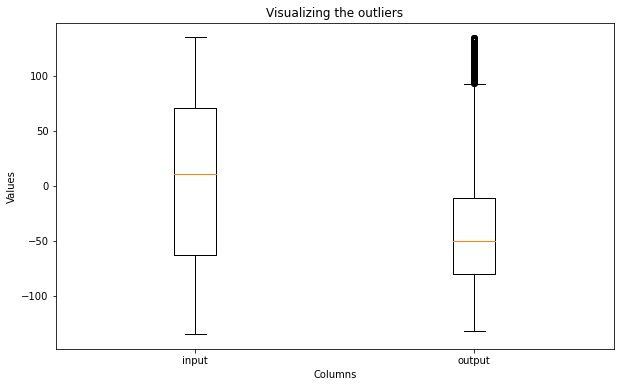

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(df, showfliers=True)
ax.set_xticklabels(df.columns)
plt.title("Visualizing the outliers")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [69]:
## Treatment of the outliers with the z-score.
from scipy import stats
# Calculating the z-score of each data point
z_input = np.abs(stats.zscore(df['input']))
z_output = np.abs(stats.zscore(df['output']))

print("The z-score is:\n",z_input)
print("-------------------------------------------------------")
print("The z-score is:\n",z_output)

The z-score is:
 0       1.568706
1       1.553396
2       1.722871
3       1.541678
4       1.659284
          ...   
1692    0.307033
1693    0.359286
1694    0.385824
1695    0.353641
1696    0.202391
Name: input, Length: 1696, dtype: float64
-------------------------------------------------------
The z-score is:
 0       1.467400
1       1.457770
2       1.460856
3       1.394228
4       1.196884
          ...   
1692    0.643221
1693    0.740801
1694    0.804724
1695    1.077615
1696    1.028701
Name: output, Length: 1696, dtype: float64


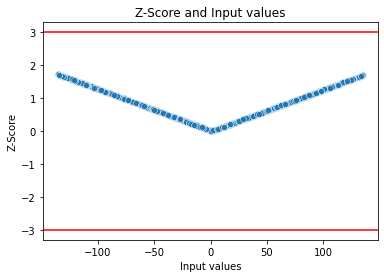

In [23]:
# Create a scatterplot with the z-score on the y-axis and the input value on the x-axis
sns.scatterplot(x=df['input'], y=z_input)
plt.xlabel("Input values")
plt.ylabel("Z-Score")
plt.title("Z-Score and Input values")
# Draw a horizontal line at the threshold
threshold = 3
plt.axhline(y=threshold, color='red', label='Threshold')
plt.axhline(y=-threshold, color='red')
plt.show()

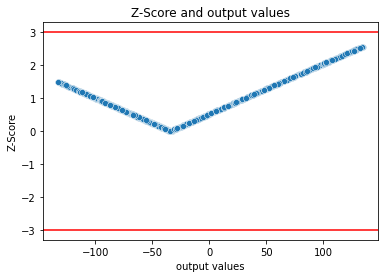

In [68]:
# Create a scatterplot with the z-score on the y-axis and the output value on the x-axis
sns.scatterplot(x=df['output'], y=z_output)
plt.xlabel("output values")
plt.ylabel("Z-Score")
plt.title("Z-Score and output values")
# Draw a horizontal line at the threshold
threshold = 3
plt.axhline(y=threshold, color='red', label='Threshold')
plt.axhline(y=-threshold, color='red')
plt.show()

A threshold of 3 will be used as a cutoff point for identifying outliers in a dataset using the Z-score method. If the Z-score of a data point is greater than 3, it means that the data point is more than 3 standard deviations away from the mean and is therefore considered an outlier. When a horizontal line is drawn at the threshold of 3 and the Z-scores are plotted against the original data, any data points that fall above the line are considered outliers. So, if the line is coming under 3, it means that there are no outliers in the data as all the Z-scores are within 3 standard deviations from the mean.

In [31]:
## Hyperparameter Tuning by Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

# Splitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [32]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [34]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print("------------------------------------------------------------------")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print("------------------------------------------------------------------")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.38530477769993
------------------------------------------------------------------
Mean Squared Error: 1539.3137140074323
------------------------------------------------------------------
Root Mean Squared Error: 39.23408867308418


In [44]:
## Hyperparameter Tuning Using Decision Tree Method:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

In [45]:
regression = DecisionTreeRegressor()  
regression.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_pred = regression.predict(X_test)

In [49]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("-------------------------------------------------------------------")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print("-------------------------------------------------------------------")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.259858271205264
-------------------------------------------------------------------
Mean Squared Error: 1200.9375036049762
-------------------------------------------------------------------
Root Mean Squared Error: 34.6545452084568


Comparing the results of the two models, it looks like the Decision Tree model has a lower mean absolute error and a lower mean squared error compared to the Random Forest model. The root mean squared error is also lower for the Decision Tree model, which indicates that its predictions are closer to the actual values

In [51]:
## Building a linear Regression Model.

from sklearn.model_selection import train_test_split
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Making predictions on the testing data
y_pred = model.predict(X_test)

In [54]:
# Evaluate the model using metrics such as Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------")
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43.89558011440079
--------------------------------------------------------------------
Mean Squared Error: 3291.4050360956
--------------------------------------------------------------------
Root Mean Squared Error: 57.37076813234768


## Model to predict output based on the input column. On the basis of Linear Regression Model

In [67]:
# Combine the y_pred and X arrays into a single array
prediction_data = np.column_stack((y_pred, X)) 
#  y_pred is the predicted values of the output based on the input, and X is the input values.
# Create a dataframe from the prediction_data array
df_prediction = pd.DataFrame(prediction_data, columns=['output', 'input'])

# Show the dataframe
print(df_prediction)

         output       input
0    -85.329719 -122.740667
1    -84.831763 -121.531419
2    -90.343814 -134.917019
3    -84.450665 -120.605951
4    -88.275708 -129.894781
...         ...         ...
1691 -24.322740   25.410184
1692 -22.623235   29.537304
1693 -21.760113   31.633331
1694 -22.806830   29.091458
1695 -27.726135   17.145296

[1696 rows x 2 columns]
